In [1]:
import gensim
import nltk
import re
import codecs
import itertools
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from tensorflow import keras

In [28]:
disaster_data = pd.read_csv('https://raw.githubusercontent.com/hundredblocks/concrete_NLP_tutorial/master/socialmedia_relevant_cols.csv',encoding = "ISO-8859-1")

In [29]:
disaster_data

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1


In [30]:
disaster_data.describe()

,class_label
count,10876.000000
mean,0.432604
std,0.498420
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [31]:
text_duplicated = disaster_data['text'].duplicated()

In [32]:
text_duplicated

0        False
1        False
2        False
3        False
4        False
         ...  
10871     True
10872     True
10873    False
10874     True
10875    False
Name: text, Length: 10876, dtype: bool

In [33]:
index_text_duplicated = text_duplicated[text_duplicated == True].index

In [34]:
index_text_duplicated

Int64Index([   59,    68,   165,   171,   172,   177,   181,   238,   524,
              898,
            ...
            10776, 10851, 10855, 10859, 10865, 10867, 10870, 10871, 10872,
            10874],
           dtype='int64', length=198)

In [35]:
disaster_data.iloc[index_text_duplicated]

,text,choose_one,class_label
59,Check these out: http://t.co/rOI2NSmEJJ http:/...,Not Relevant,0
68,Check these out: http://t.co/rOI2NSmEJJ http:/...,Not Relevant,0
165,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,Not Relevant,0
171,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,Not Relevant,0
172,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,Not Relevant,0
...,...,...,...
10867,#stormchase Violent Record Breaking EF-5 El Re...,Relevant,1
10870,@aria_ahrary @TheTawniest The out of control w...,Relevant,1
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1


In [36]:
disaster_data.drop_duplicates('text',inplace=True)

In [37]:
def standizer_text(df,text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+","")
    df[text_field] = df[text_field].str.replace(r"http","")
    df[text_field] = df[text_field].str.replace(r"@\S+","")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]"," ")
    df[text_field] = df[text_field].str.replace(r"@","at")
    df[text_field] = df[text_field].str.lower()
    
    return df

In [38]:
clean_questions = standizer_text(disaster_data,'text')

<ipython-input-37-cc0fddc1ce65>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"http\S+","")
<ipython-input-37-cc0fddc1ce65>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"@\S+","")
<ipython-input-37-cc0fddc1ce65>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]"," ")


In [40]:
clean_questions.head()

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this earthquake m...,Relevant,1
2,"heard about earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask canada,Relevant,1


In [41]:
clean_questions.tail()

,text,choose_one,class_label
10866,suicide bomber kills 15 in saudi security site...,Relevant,1
10868,green line derailment in chicago,Relevant,1
10869,two giant cranes holding a bridge collapse int...,Relevant,1
10873,the latest more homes razed by northern calif...,Relevant,1
10875,cityofcalgary has activated its municipal eme...,Relevant,1


In [42]:
clean_questions.groupby('class_label').count()

,text,choose_one
class_label,,
0,6120,6120
1,4543,4543
2,15,15


In [43]:
from nltk.tokenize import RegexpTokenizer

In [44]:
tokenizer = RegexpTokenizer(r'\w+')

In [45]:
clean_questions["tokens"] = clean_questions['text'].apply(tokenizer.tokenize)

In [46]:
clean_questions

,text,choose_one,class_label,tokens
0,just happened a terrible car crash,Relevant,1,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this earthquake m...,Relevant,1,"[our, deeds, are, the, reason, of, this, earth..."
2,"heard about earthquake is different cities, s...",Relevant,1,"[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]"
...,...,...,...,...
10866,suicide bomber kills 15 in saudi security site...,Relevant,1,"[suicide, bomber, kills, 15, in, saudi, securi..."
10868,green line derailment in chicago,Relevant,1,"[green, line, derailment, in, chicago]"
10869,two giant cranes holding a bridge collapse int...,Relevant,1,"[two, giant, cranes, holding, a, bridge, colla..."
10873,the latest more homes razed by northern calif...,Relevant,1,"[the, latest, more, homes, razed, by, northern..."


In [53]:
all_words = [word for token in clean_questions['tokens'] for word in token]
sentences_lengths = [len(token) for token in clean_questions['tokens']]
vocab = sorted(list(set(all_words)))

In [54]:
vocab

['0',
 '00',
 '000',
 '0000',
 '00am',
 '00end',
 '00pm',
 '01',
 '02',
 '0215',
 '02pm',
 '03',
 '030',
 '032',
 '033',
 '034',
 '039',
 '04',
 '05',
 '0518',
 '05th',
 '06',
 '060',
 '061',
 '06jst',
 '07',
 '08',
 '0840728',
 '0853',
 '087809233445',
 '0880',
 '09',
 '0992',
 '0l',
 '0npzp',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000s',
 '1008pla',
 '1008planet',
 '100bn',
 '100mb',
 '100nd',
 '100s',
 '101',
 '1017',
 '1023',
 '1028',
 '103',
 '105',
 '106',
 '107',
 '109',
 '10am',
 '10k',
 '10km',
 '10m',
 '10news',
 '10pm',
 '10th',
 '10w',
 '10x',
 '11',
 '11000',
 '11000000',
 '111020',
 '1115',
 '11211',
 '114',
 '1141',
 '1145',
 '1148',
 '115',
 '1179',
 '118',
 '119',
 '119000',
 '11am',
 '11th',
 '12',
 '120',
 '1200',
 '12000',
 '120000',
 '1200000',
 '120v',
 '1236',
 '124',
 '1245z',
 '125',
 '126',
 '129',
 '12am',
 '12hr',
 '12jst',
 '12k',
 '12m',
 '12mm',
 '12news',
 '12pm',
 '12th',
 '12u',
 '12v',
 '13',
 '130',
 '13000',
 '133',
 '138',
 '139055',

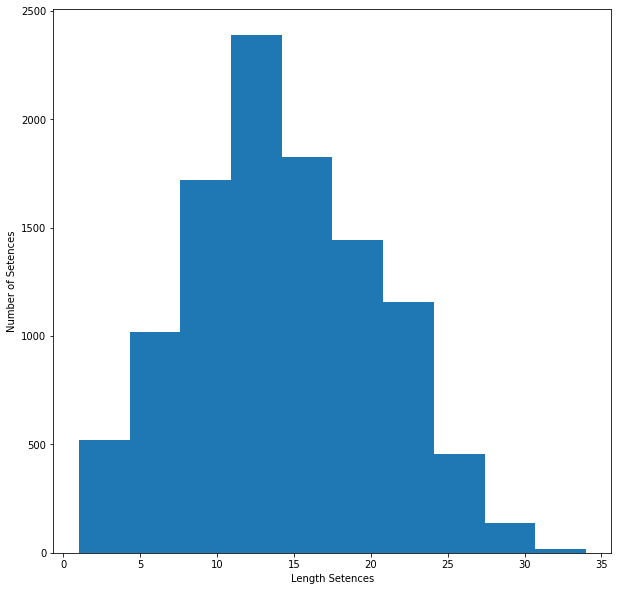

In [55]:
fig = plt.figure(figsize=(10,10))
plt.xlabel('Length Setences')
plt.ylabel('Number of Setences')
plt.hist(sentences_lengths)
plt.show()

In [56]:
clean_questions.to_csv('clean_dataset')